<a href="https://colab.research.google.com/github/johanneskar/finalassignment/blob/main/FinalAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1: Biggest predictor of CO2 output

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%reload_ext google.colab.data_table

In [55]:
df = pd.read_csv("https://raw.githubusercontent.com/johanneskar/finalassignment/main/owid-co2-data.csv")

In [56]:
df = df.drop(columns=['iso_code', 'cement_co2',
       'cement_co2_per_capita', 'co2_growth_abs', 'co2_growth_prct',
       'co2_per_unit_energy', 'coal_co2', 'flaring_co2_per_capita', 
       'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'gas_co2',
       'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'methane', 'methane_per_capita', 'nitrous_oxide',
       'nitrous_oxide_per_capita', 'oil_co2',
       'other_co2_per_capita', 'other_industry_co2',
       'primary_energy_consumption', 'share_global_cement_co2',
       'share_global_co2', 'share_global_coal_co2',
       'share_global_cumulative_cement_co2', 'share_global_cumulative_co2',
       'share_global_cumulative_coal_co2',
       'share_global_cumulative_flaring_co2',
       'share_global_cumulative_gas_co2', 'share_global_cumulative_oil_co2',
       'share_global_cumulative_other_co2', 'share_global_flaring_co2',
       'share_global_gas_co2', 'share_global_oil_co2',
       'share_global_other_co2', 'total_ghg', 'total_ghg_excluding_lucf',
       'trade_co2', 'trade_co2_share'])


In [61]:
# remove all non countries from country column
df.country.unique()
remove_from_country = ['Africa', 'Asia', 'Asia (excl. China & India)', 'Europe', 'Europe (excl. EU-27)',
       'Europe (excl. EU-28)', 'European Union (27)', 'Antarctica',
       'European Union (28)',  'International transport', 'High-income countries', 
       'Kuwaiti Oil Fires', 'Low-income countries', 'Lower-middle-income countries', 'World',
        'North America','North America (excl. USA)', 'Oceania', 'Upper-middle-income countries', 'South America']

df2 = df[~df['country'].isin(remove_from_country)]
df2

,country,year,population,gdp,co2,co2_per_capita,co2_per_gdp,coal_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita
0,Afghanistan,1949,7624058.00,NaN,0.01,0.00,NaN,0.00,NaN,NaN
1,Afghanistan,1950,7752117.00,9421400064.00,0.08,0.01,0.01,0.00,NaN,0.01
2,Afghanistan,1951,7840151.00,9692279808.00,0.09,0.01,0.01,0.00,NaN,0.01
3,Afghanistan,1952,7935996.00,10017325056.00,0.09,0.01,0.01,0.00,NaN,0.01
4,Afghanistan,1953,8039684.00,10630519808.00,0.11,0.01,0.01,0.01,NaN,0.01
...,...,...,...,...,...,...,...,...,...,...
26003,Zimbabwe,2016,14030338.00,20961794048.00,10.74,0.77,0.51,0.50,NaN,0.22
26004,Zimbabwe,2017,14236599.00,21947836416.00,9.58,0.67,0.44,0.40,NaN,0.23
26005,Zimbabwe,2018,14438812.00,22715353088.00,11.85,0.82,0.52,0.49,NaN,0.28
26006,Zimbabwe,2019,14645473.00,NaN,10.95,0.75,NaN,0.41,NaN,0.29


In [58]:
# add a column 'gdp_per_capita'

gdplist = df2.loc[:,'gdp'] / df2.loc[:,'population']

df2.insert(4, 'gdp_per_capita', gdplist, True)


In [59]:
df2

,country,year,population,gdp,gdp_per_capita,co2,co2_per_capita,co2_per_gdp,coal_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita
0,Afghanistan,1949,7624058.00,NaN,NaN,0.01,0.00,NaN,0.00,NaN,NaN
1,Afghanistan,1950,7752117.00,9421400064.00,1215.33,0.08,0.01,0.01,0.00,NaN,0.01
2,Afghanistan,1951,7840151.00,9692279808.00,1236.24,0.09,0.01,0.01,0.00,NaN,0.01
3,Afghanistan,1952,7935996.00,10017325056.00,1262.26,0.09,0.01,0.01,0.00,NaN,0.01
4,Afghanistan,1953,8039684.00,10630519808.00,1322.26,0.11,0.01,0.01,0.01,NaN,0.01
...,...,...,...,...,...,...,...,...,...,...,...
26003,Zimbabwe,2016,14030338.00,20961794048.00,1494.03,10.74,0.77,0.51,0.50,NaN,0.22
26004,Zimbabwe,2017,14236599.00,21947836416.00,1541.65,9.58,0.67,0.44,0.40,NaN,0.23
26005,Zimbabwe,2018,14438812.00,22715353088.00,1573.21,11.85,0.82,0.52,0.49,NaN,0.28
26006,Zimbabwe,2019,14645473.00,NaN,NaN,10.95,0.75,NaN,0.41,NaN,0.29


In [60]:
# correlation between co2 per capita and gdp per capita 
df_co2_gdp = df2[['year', 'gdp_per_capita', 'co2_per_capita']].dropna()
df_co2_gdp.corr()

,year,gdp_per_capita,co2_per_capita
year,1.00,0.33,0.17
gdp_per_capita,0.33,1.00,0.67
co2_per_capita,0.17,0.67,1.00


In [ ]:
df_co2_gdp

In [ ]:
# correlation between co2 per capita and gdp per capita from 2010
df_test_gdp = df_co2_gdp.loc[df_co2_gdp['year']>2009]
df_test_gdp.corr()

,year,gdp_per_capita,co2_per_capita
year,1.000000,0.032755,-0.018186
gdp_per_capita,0.032755,1.000000,0.801256
co2_per_capita,-0.018186,0.801256,1.000000


In [ ]:
# correlation between co2 per capita and gdp per capita per country

df_co2_gdp_country = df2[['country', 'gdp_per_capita', 'co2_per_capita']].dropna()
df_co2_gdp_country.groupby(['country']).corr()

gdp_per_capita  co2_per_capita
country                                                   
Afghanistan gdp_per_capita        1.000000        0.533793
            co2_per_capita        0.533793        1.000000
Albania     gdp_per_capita        1.000000        0.213598
            co2_per_capita        0.213598        1.000000
Algeria     gdp_per_capita        1.000000        0.725692
...                                    ...             ...
Yemen       co2_per_capita        0.468480        1.000000
Zambia      gdp_per_capita        1.000000       -0.294011
            co2_per_capita       -0.294011        1.000000
Zimbabwe    gdp_per_capita        1.000000        0.354354
            co2_per_capita        0.354354        1.000000

[328 rows x 2 columns]

In [ ]:
# # correlation between co2 per capita and diets per capita
df_diets = pd.read_csv("https://raw.githubusercontent.com/johanneskar/finalassignment/main/daily-caloric-supply-derived-from-carbohydrates-protein-and-fat.csv")
df_diets.rename(columns={'Entity': 'country', 'Year': 'year'}, inplace = True)

In [ ]:
df_diets.drop(columns = ['Code'], inplace = True)
df2_co2_country = df2[['country', 'year', 'co2_per_capita']].dropna()

In [ ]:
df_diets

In [ ]:
df2_co2_country.dropna()

,country,year,co2_per_capita
0,Afghanistan,1949,0.002
1,Afghanistan,1950,0.011
2,Afghanistan,1951,0.012
3,Afghanistan,1952,0.012
4,Afghanistan,1953,0.013
...,...,...,...
26003,Zimbabwe,2016,0.765
26004,Zimbabwe,2017,0.673
26005,Zimbabwe,2018,0.821
26006,Zimbabwe,2019,0.748


In [ ]:
# merge the two dataframes into one
df_co2_diet = pd.merge(df2_co2_country, df_diets)

In [ ]:
df_co2_diet

In [ ]:
df_co2_diet.corr()

,year,co2_per_capita,Calories from animal protein (FAO (2017)),Calories from plant protein (FAO (2017)),Calories from fat (FAO (2017)),Calories from carbohydrates (FAO (2017))
year,1.000000,0.060043,0.158535,0.090240,0.226003,0.115234
co2_per_capita,0.060043,1.000000,0.558747,0.058008,0.521938,0.227563
Calories from animal protein (FAO (2017)),0.158535,0.558747,1.000000,-0.072988,0.891016,0.216134
Calories from plant protein (FAO (2017)),0.090240,0.058008,-0.072988,1.000000,0.010696,0.709927
Calories from fat (FAO (2017)),0.226003,0.521938,0.891016,0.010696,1.000000,0.211598
Calories from carbohydrates (FAO (2017)),0.115234,0.227563,0.216134,0.709927,0.211598,1.000000


In [ ]:
# correlation between co2 per capita and number of cars
df_num_mot_veh = pd.read_csv('https://raw.githubusercontent.com/johanneskar/finalassignment/main/road-motor-vehicle-ownership-per-1000-people-2014.csv')
df_num_mot_veh.drop(columns = ['Code'], inplace = True)
df_num_mot_veh.rename(columns={'Entity': 'country', 'Year': 'year'}, inplace = True)


In [ ]:
df_num_mot_veh

In [ ]:
df_co2_vehicles = pd.merge(df2_co2_country, df_num_mot_veh)
df_co2_vehicles.corr()

,year,co2_per_capita,Motor vehicles per 1000 people (NationMaster (2014))
year,NaN,NaN,NaN
co2_per_capita,NaN,1.000000,0.620027
Motor vehicles per 1000 people (NationMaster (2014)),NaN,0.620027,1.000000


In [ ]:
# correlation between co2 per capita and various energy sources
df_co2_energy = df2[['country', 'year','coal_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita', 'co2_per_capita']]
df_co2_energy.corr()

In [ ]:
df_co2_energy

In [ ]:
# correlation between co2 per capita and various energy sources from 2010
df_test = df_co2_energy.loc[df_co2_energy['year']>2009]
df_test.corr()

In [ ]:
# correlation between co2 per capita and share of industry in gdp
df_share_industry = pd.read_csv('https://raw.githubusercontent.com/johanneskar/finalassignment/main/GDP-vs-industry-GDP-at-constant-prices.csv')

In [ ]:
df_share_industry

,Entity,Code,Year,Share of industry in GDP at constant 2005 prices (GGDC),GDP per capita,417485-annotations,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1950,NaN,1156.0,NaN,7480464.0,NaN
2,Afghanistan,AFG,1951,NaN,1170.0,NaN,7571542.0,NaN
3,Afghanistan,AFG,1952,NaN,1189.0,NaN,7667534.0,NaN
4,Afghanistan,AFG,1953,NaN,1240.0,NaN,7764549.0,NaN
...,...,...,...,...,...,...,...,...
61161,Zimbabwe,ZWE,1949,NaN,NaN,NaN,2681604.0,NaN
61162,Zimbabwe,ZWE,2019,NaN,NaN,NaN,15354606.0,NaN
61163,Zimbabwe,ZWE,2020,NaN,NaN,NaN,15669663.0,NaN
61164,Zimbabwe,ZWE,2021,NaN,NaN,NaN,15993525.0,NaN


In [ ]:
df_share_industry.rename(columns={'Entity': 'country', 'Year': 'year', 'Share of industry in GDP at constant 2005 prices (GGDC)': 'share of industry'}, inplace = True)
df_share_new = df_share_industry[['country', 'year', 'share of industry']]
df_share_new.head()
df_co2_industry = pd.merge(df2_co2_country, df_share_new)


In [ ]:
df_co2_industry.dropna(inplace = True)
df_co2_industry.groupby('country').corr()

In [ ]:
df_co2_industry.corr()

,year,co2_per_capita,share of industry
year,1.000000,0.089490,-0.030586
co2_per_capita,0.089490,1.000000,0.098938
share of industry,-0.030586,0.098938,1.000000


2: Biggest strides in decreasing CO2 output

In [ ]:
df2

,country,year,population,gdp,gdp_per_capita,co2,co2_per_capita,co2_per_gdp,coal_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita
0,Afghanistan,1949,7624058.0,NaN,NaN,0.015,0.002,NaN,0.002,NaN,NaN
1,Afghanistan,1950,7752117.0,9.421400e+09,1215.332543,0.084,0.011,0.009,0.003,NaN,0.008
2,Afghanistan,1951,7840151.0,9.692280e+09,1236.236369,0.092,0.012,0.009,0.003,NaN,0.008
3,Afghanistan,1952,7935996.0,1.001733e+10,1262.264378,0.092,0.012,0.009,0.004,NaN,0.007
4,Afghanistan,1953,8039684.0,1.063052e+10,1322.255925,0.106,0.013,0.010,0.005,NaN,0.009
...,...,...,...,...,...,...,...,...,...,...,...
26003,Zimbabwe,2016,14030338.0,2.096179e+10,1494.033433,10.738,0.765,0.512,0.496,NaN,0.224
26004,Zimbabwe,2017,14236599.0,2.194784e+10,1541.648846,9.582,0.673,0.437,0.398,NaN,0.228
26005,Zimbabwe,2018,14438812.0,2.271535e+10,1573.214825,11.854,0.821,0.522,0.492,NaN,0.281
26006,Zimbabwe,2019,14645473.0,NaN,NaN,10.949,0.748,NaN,0.411,NaN,0.289


In [ ]:
# find the first year with data for almost all countries in regards to co2 and population
df_rel_co2 = df2[['country', 'year', 'population', 'co2', 'co2_per_capita']]
df_rel_co2['country'].nunique()

227

In [ ]:
df_rel_co2['year'].value_counts().head(50)

In [ ]:
df1990 = df_rel_co2.loc[df_rel_co2['year'] == 1990]
df2005 = df_rel_co2.loc[df_rel_co2['year'] == 2005]
df2020 = df_rel_co2.loc[df_rel_co2['year'] == 2020]
df2_rel_co2 = df1990.merge(df2005,on='country').merge(df2020,on='country')
df2_rel_co2.columns = ['country', 'year_x', 'population_1990', 'co2_1990', 'co2_per_capita_1990',
       'year_2005', 'population_2005', 'co2_2005', 'co2_per_capita_2005', 'year',
       'population_2020', 'co2_2020', 'co2_per_capita_2020']
df2_rel_co2.drop(columns = ['year_x', 'year_2005', 'year'], inplace = True)
df3_rel_co2 = df2_rel_co2.dropna(how='any')

# filter out the countries with a small amount of co2-emission
min_5ton = df3_rel_co2.loc[:, 'co2_1990'] >= 5
df_rel_co2_5ton = df3_rel_co2.loc[min_5ton]
df_rel_co2_5ton


In [ ]:
# what is the top 10 of countries with the biggest absolute decrease in co2-emission between 2020 and 1990?
df_abs_decrease = df3_rel_co2[['country', 'co2_1990', 'co2_2020']]
abs_co2_decrease = df3_rel_co2['co2_2020'] - df3_rel_co2['co2_1990']
df_abs_decrease.insert(3, 'absolute_decrease_co2', abs_co2_decrease)
df_abs_decrease_sorted = df_abs_decrease.sort_values(by=['absolute_decrease_co2'])
top10_absolute_decrease = df_abs_decrease_sorted.head(10).reset_index()
top10_absolute_decrease.index = top10_absolute_decrease.index + 1
top10_absolute_decrease

,index,country,co2_1990,co2_2020,absolute_decrease_co2
1,167,Russia,2525.518,1577.136,-948.382
2,213,Ukraine,705.830,213.909,-491.921
3,77,Germany,1052.477,644.310,-408.167
4,216,United States,5113.455,4712.771,-400.684
5,215,United Kingdom,600.344,329.579,-270.765
6,98,Italy,439.550,303.815,-135.735
7,100,Japan,1158.007,1030.775,-127.232
8,69,France,392.998,276.634,-116.364
9,166,Romania,170.880,71.475,-99.405
10,148,North Korea,122.400,29.311,-93.089


In [ ]:
# what is the top 10 of countries with the biggest decrease in co2-emission per capita between 2020 and 1990?
df_decrease_per_capita = df_rel_co2_5ton[['country', 'co2_per_capita_1990', 'co2_per_capita_2020']]
decrease_per_capita = df_decrease_per_capita.loc[:,'co2_per_capita_2020'] - df_decrease_per_capita.loc[:,'co2_per_capita_1990']
df_decrease_per_capita.insert(3, 'decrease_per_capita', decrease_per_capita)
top10_decrease_per_capita = df_decrease_per_capita.sort_values(by='decrease_per_capita').head(10).reset_index()
top10_decrease_per_capita.index = top10_decrease_per_capita.index + 1
top10_decrease_per_capita

,index,country,co2_per_capita_1990,co2_per_capita_2020,decrease_per_capita
1,116,Luxembourg,30.969,13.059,-17.910
2,63,Estonia,24.054,7.879,-16.175
3,214,United Arab Emirates,28.278,15.193,-13.085
4,213,Ukraine,13.715,4.891,-8.824
5,52,Czechia,15.879,8.215,-7.664
6,131,Moldova,8.392,1.276,-7.116
7,182,Singapore,14.449,7.778,-6.671
8,167,Russia,17.118,10.807,-6.311
9,216,United States,20.282,14.238,-6.044
10,184,Slovakia,11.624,5.629,-5.995


In [ ]:
# what is the top 10 of countries with the biggest relative decrease in co2-emission between 2020 and 1990?
df_rel_output = df3_rel_co2[['country', 'co2_1990']]
rel_co2_2005 = df3_rel_co2.loc[:,'co2_2005'] / df3_rel_co2.loc[:,'co2_1990']
rel_co2_2020 = df3_rel_co2.loc[:,'co2_2020'] / df3_rel_co2.loc[:,'co2_1990']
df_rel_output.insert(2, 'relative_co2_2005_compared_with_1990', rel_co2_2005, True)
df_rel_output.insert(3, 'relative_co2_2020_compared_with_1990', rel_co2_2020, True)
df_rel_output
# filter out the countries with a small amount of co2-emission
min_5ton = df_rel_output.loc[:, "co2_1990"] >= 5
df_rel_output_5ton = df_rel_output.loc[min_5ton]

df_rel_output_5ton_sorted = df_rel_output_5ton.sort_values(by=['relative_co2_2020_compared_with_1990'])
top10_relative_decrease = df_rel_output_5ton_sorted.head(10).reset_index()
top10_relative_decrease.index = top10_relative_decrease.index + 1
top10_relative_decrease

,index,country,co2_1990,relative_co2_2005_compared_with_1990,relative_co2_2020_compared_with_1990
1,131,Moldova,36.634,0.134793,0.140498
2,148,North Korea,122.400,0.612092,0.239469
3,63,Estonia,37.650,0.455671,0.277610
4,213,Ukraine,705.830,0.443617,0.303060
5,108,Latvia,19.661,0.397284,0.344489
6,115,Lithuania,35.768,0.394682,0.385792
7,166,Romania,170.880,0.586722,0.418276
8,30,Bulgaria,76.699,0.660452,0.488194
9,54,Denmark,53.573,0.961417,0.488959
10,184,Slovakia,61.475,0.696104,0.499878


3: Best future price for non-fossil fuel energy

In [2]:
df_non_fos = pd.read_csv('https://raw.githubusercontent.com/johanneskar/finalassignment/main/levelized-cost-of-energy.csv')
df_nf_world = df_non_fos.loc[(df_non_fos.loc[:,'Entity']=='World') & (df_non_fos.loc[:,'Year'] > 2009)]
df_nf_world

,Entity,Code,Year,Bioenergy levelized cost of energy,Geothermal levelized cost of energy,Offshore wind levelized cost of energy,Solar photovoltaic levelized cost of energy,Concentrated solar power levelized cost of energy,Hydropower levelized cost of energy,Onshore wind levelized cost of energy
447,World,OWID_WRL,2010,0.078189,0.050445,0.187857,0.417149,0.358004,0.038883,0.102061
448,World,OWID_WRL,2011,0.056684,NaN,0.197549,0.311298,0.346655,0.036561,0.096487
449,World,OWID_WRL,2012,0.061879,0.085695,0.166601,0.232633,0.337574,0.038038,0.088390
450,World,OWID_WRL,2013,0.082198,0.064111,0.166662,0.179401,0.248888,0.042512,0.089206
451,World,OWID_WRL,2014,0.082375,0.065335,0.172199,0.161258,0.216377,0.042457,0.080203
452,World,OWID_WRL,2015,0.072771,0.058849,0.140527,0.121080,0.223889,0.036572,0.068962
453,World,OWID_WRL,2016,0.071178,0.067802,0.116323,0.106340,0.247269,0.048389,0.063855
454,World,OWID_WRL,2017,0.071070,0.070917,0.106152,0.083660,0.206213,0.050722,0.059959
455,World,OWID_WRL,2018,0.055360,0.067583,0.100049,0.071139,0.149103,0.039837,0.050880
456,World,OWID_WRL,2019,0.063933,0.067305,0.086388,0.062119,0.211831,0.041409,0.044592


In [8]:
# The data are complete from 2010 to 2021. There is however one NaN value. I am imputing this value with the mean of the column.
df_nf_world = df_nf_world.fillna(df_nf_world.loc[:,'Bioenergy levelized cost of energy'].mean()) 

In [51]:
%precision 2 
pd.options.display.float_format = '{:.2f}'.format 
df_nf_world

,Entity,Code,Year,Bioenergy levelized cost of energy,Geothermal levelized cost of energy,Offshore wind levelized cost of energy,Solar photovoltaic levelized cost of energy,Concentrated solar power levelized cost of energy,Hydropower levelized cost of energy,Onshore wind levelized cost of energy
447,World,OWID_WRL,2010,0.08,0.05,0.19,0.42,0.36,0.04,0.10
448,World,OWID_WRL,2011,0.06,0.07,0.20,0.31,0.35,0.04,0.10
449,World,OWID_WRL,2012,0.06,0.09,0.17,0.23,0.34,0.04,0.09
450,World,OWID_WRL,2013,0.08,0.06,0.17,0.18,0.25,0.04,0.09
451,World,OWID_WRL,2014,0.08,0.07,0.17,0.16,0.22,0.04,0.08
452,World,OWID_WRL,2015,0.07,0.06,0.14,0.12,0.22,0.04,0.07
453,World,OWID_WRL,2016,0.07,0.07,0.12,0.11,0.25,0.05,0.06
454,World,OWID_WRL,2017,0.07,0.07,0.11,0.08,0.21,0.05,0.06
455,World,OWID_WRL,2018,0.06,0.07,0.10,0.07,0.15,0.04,0.05
456,World,OWID_WRL,2019,0.06,0.07,0.09,0.06,0.21,0.04,0.04


<Figure size 432x288 with 0 Axes>

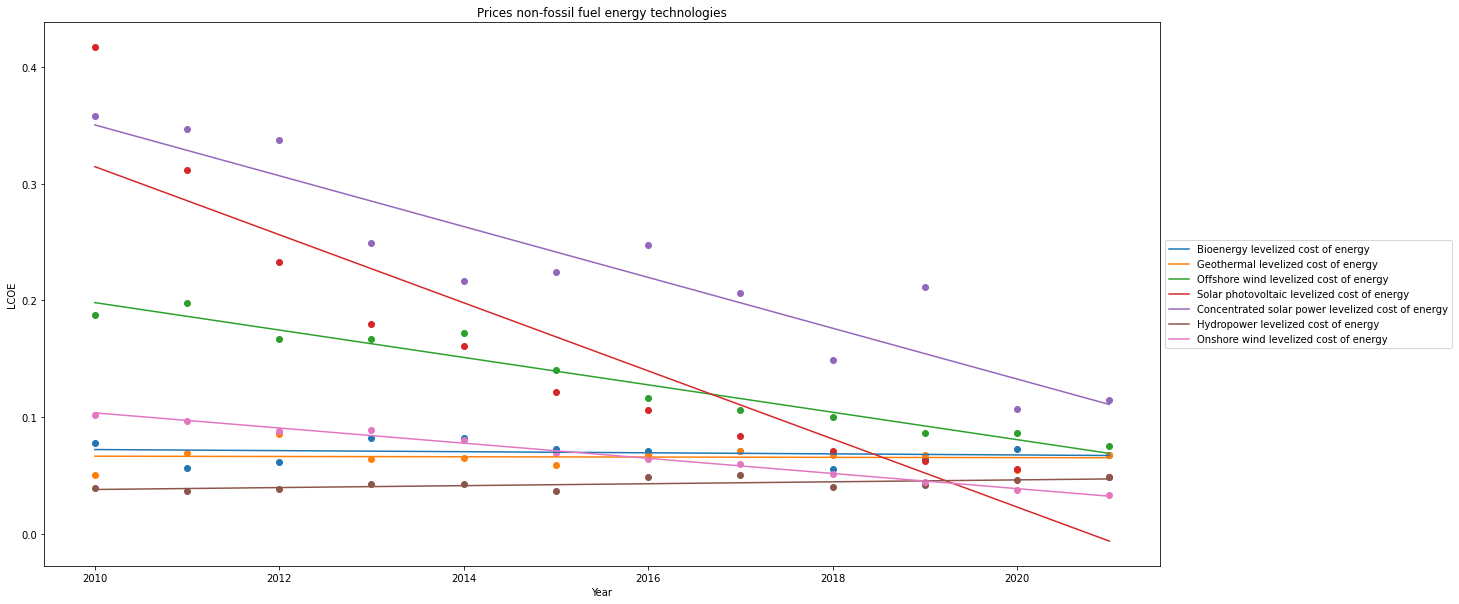

In [53]:
from sklearn.linear_model import LinearRegression
fig = plt.figure()
fig, ax = plt.subplots()
a=3
for a in range (3,10):
  X = df_nf_world.iloc[:, 2].values.reshape(-1, 1)  # values converts it into a numpy array
  Y = df_nf_world.iloc[:, a].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
  linear_regressor = LinearRegression()  # create object for the class
  linear_regressor.fit(X, Y)  # perform linear regression
  Y_pred = linear_regressor.predict(X)  # make predictions
  ax.scatter(X, Y)
  ax.plot(X, Y_pred, label=df_nf_world.columns[a])
ax.set_xlabel('Year')
ax.set_ylabel('LCOE')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Prices non-fossil fuel energy technologies')
fig.set_size_inches(20,10)
plt.show()